# Part 2b — Paragraphs analysis of Whitehead

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer 
import pandas as pd
from urllib import request
import re

In [2]:
from sklearn.decomposition import NMF

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
whitehead_pr_filename = 'Whitehead_process_and_reality.txt'
whitehead_pr_file = open(whitehead_pr_filename , 'rt')
whitehead_pr_string = whitehead_pr_file.read()

In [4]:
hume_ECHU = 'https://www.gutenberg.org/cache/epub/9662/pg9662.txt'
url = hume_ECHU 
response = request.urlopen(url)

In [5]:
# hume_string = response.read().decode('utf8')

In [6]:
hume_string = whitehead_pr_string

In [7]:
len(hume_string)

1184071

In [8]:
hume_string.index('CHAPTER I')

61073

In [9]:
section_1_pos= hume_string.index('CHAPTER I')
hume_excerpt = hume_string[section_1_pos:section_1_pos+1000]
hume_excerpt

"CHAPTER I \nSPECULATIVE PHILOSOPHY \n\nSECTION I \n\n[4] This course of lectures is designed as an essay in Speculative Philos- \nophy. Its first task must be to define 'speculative philosophy/ and to de- \nfend it as a method productive of important knowledge. \n\nSpeculative Philosophy is the endeavour to frame a coherent, logical, \nnecessary system of general ideas in terms of which every element of our \nexperience can be interpreted. By this notion of 'interpretation' I mean \nthat everything of which we are conscious, as enjoyed, perceived, willed, \nor thought, shall have the character of a particular instance of the general \nscheme. Thus the philosophical scheme should be coherent, logical, and, \nin respect to its interpretation, applicable and adequate. Here 'applicable' \nmeans that some items of experience are thus interpretable, and 'ade- \nquate' means that there are no items incapable of such interpretation. \n\n[5] 'Coherence,' as here employed, means that the fundam

#### Different ways to remove newlines etc

In [10]:
def remove_pseudo_soft_returns(s):
    s = s.replace('\n\n'*3, '^S ^p ').replace(' \n\n', '^p ').replace('\n\n', ' ').replace('- \n', '').replace(' \n', ' ')
    return s

In [11]:
hume_par = remove_pseudo_soft_returns(hume_string)

In [12]:
hume_par_list = hume_par.split('^p')
hume_par_list

['Skip to main content\n Search\n UPLOAD\n SIGN UP | LOG IN\n     ABOUT BLOG PROJECTS HELP DONATE  CONTACT JOBS VOLUNTEER PEOPLE\n Search Metadata\n Search text contents\n Search TV news captions\n Search radio transcripts\n Search archived websites\nAdvanced Search\nSign up for free\nLog in\nFull text of "Alfred North Whitehead - Process & Reality"\nSee other formats\nPROCESS AND REALITY',
 ' AN ESSAY IN COSMOLOGY',
 ' Gifford Lectures Delivered in the University of Edinburgh During the Session 1927-28',
 ' BY',
 ' ALFRED NORTH WHITEHEAD',
 ' F.R.S., ScD. (Cambridge), Hon. D.Sc. (Manchester),',
 ' Hon. LL.D. (St. Andrews), Hon. D.Sc. (Wisconsin),',
 ' Hon. Sc.D. (Harvard and Yale)',
 ' CORRECTED EDITION',
 ' Edited By',
 ' DAVID RAY GRIFFIN',
 ' AND',
 ' DONALD W. SHERBURNE',
 '  THE FREE PRESS',
 ' A Division of Macmillan Publishing Co,, Inc.',
 ' New York',
 '  Copyright © 1978 by The Free Press',
 ' A Division of Macmillan Publishing Co., Inc. Copyright, 1929, by Macmillan Publishi

In [13]:
len(hume_par_list)

3396

In [14]:
hume_echu_par_df = pd.DataFrame(hume_par_list)

In [15]:
hume_echu_par_df.rename(columns = {0:'par_text'}, inplace=True)


In [16]:
#hume_echu_par_df.iloc[360:400, :]

In [17]:
start_maintext_row = hume_echu_par_df[hume_echu_par_df['par_text'].str.contains('CHAPTER I')].index[0]
start_maintext_row


317

In [18]:
start_maintext_row = hume_echu_par_df[hume_echu_par_df['par_text'].str.contains('CHAPTER I')].index.values.astype(int)[0]
start_maintext_row

317

In [19]:
end_string = '  Index' 
#end_string = 'Actual occasion (cont.)' 
#end_string = '''Actual occasion (cont'''
#print(end_string)

In [20]:
hume_echu_par_df.iloc[2571]['par_text']

'  Index'

In [21]:
hume_echu_par_df[(hume_echu_par_df['par_text'].str.contains(end_string)) ].index.values.astype(int)[0]

2571

In [22]:
type(hume_echu_par_df[(hume_echu_par_df['par_text'].str.contains(end_string)) ].iloc[0] )

pandas.core.series.Series

In [23]:
#hume_echu_par_df[hume_echu_par_df['par_text'].str.contains('Actual occasion')]

In [24]:


end_material_row = hume_echu_par_df[hume_echu_par_df['par_text'].str.contains(end_string)]
#end_material_row
end_material_row

,par_text
2571,Index
2620,Index
2656,Index
2680,Index
2707,Index
2727,Index
2749,Index
2787,Index
2804,Index
2831,Index


In [25]:
end_material_row = 2571

In [26]:
hume_echu_par_df = hume_echu_par_df.loc[start_maintext_row:end_material_row-1, :]
hume_echu_par_df.tail(50) 

,par_text
2521,yond that limit there is degeneration: The li...
2522,The social history of mankind exhibits great ...
2523,The same principle is exhibited by the tedium...
2524,But the two elements must not really be disjo...
2525,340 Final Interpretation
2526,SECTION IV
2527,"The world is thus faced by the paradox that, ..."
2528,"To die be given, or attain, Fierce work it we..."
2529,Each new epoch enters upon its career by wagi...
2530,[517] This is the problem which gradually sha...


In [27]:
hume_echu_par_df.head(50) 

,par_text
317,CHAPTER I SPECULATIVE PHILOSOPHY
318,SECTION I
319,[4] This course of lectures is designed as an...
320,Speculative Philosophy is the endeavour to fr...
321,"[5] 'Coherence,' as here employed, means that..."
322,"The term 'logical' has its ordinary meaning, ..."
323,It will also be noticed that this ideal of sp...
324,4 The Speculative Scheme
325,means that the texture of observed experience...
326,This doctrine of necessity in universality me...


In [28]:
hume_echu_par_df.size

2254

#### Tokenize

In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [30]:
def sent_tokenize_string_of_text(text): 
    return sent_tokenize(text)
    
sent_toke = sent_tokenize_string_of_text

In [31]:
def word_tokenize_string_of_text(text): 
    return word_tokenize(text)
    
word_toke = word_tokenize_string_of_text

In [32]:
hume_echu_par_df['word_tokenized_par'] = hume_echu_par_df['par_text'].apply(word_toke)

In [33]:
hume_echu_par_df

,par_text,word_tokenized_par
317,CHAPTER I SPECULATIVE PHILOSOPHY,"[CHAPTER, I, SPECULATIVE, PHILOSOPHY]"
318,SECTION I,"[SECTION, I]"
319,[4] This course of lectures is designed as an...,"[[, 4, ], This, course, of, lectures, is, desi..."
320,Speculative Philosophy is the endeavour to fr...,"[Speculative, Philosophy, is, the, endeavour, ..."
321,"[5] 'Coherence,' as here employed, means that...","[[, 5, ], 'Coherence, ,, ', as, here, employed..."
...,...,...
2566,SECTION VII,"[SECTION, VII]"
2567,Thus the consequent nature of God is composed...,"[Thus, the, consequent, nature, of, God, is, c..."
2568,Each actuality in the temporal world has its ...,"[Each, actuality, in, the, temporal, world, ha..."
2569,But the principle of universal relativity is ...,"[But, the, principle, of, universal, relativit..."


### Snowball stemmer

In [34]:
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

def stem_string_of_text(text):
    word_list = [stemmer.stem(w) for w in text.split(' ')]
    return ' '.join(word_list)

# text_string = 'philosophy philosophize philosophical philosopher'
# stem_string_of_text(text_string)

In [35]:
lemma = nltk.stem.WordNetLemmatizer()

def lemmatize_string_of_text(text):
    word_list = [lemma.lemmatize(w) for w in text.split(' ')]
    return ' '.join(word_list)

# text_string = 'principle principles principled'
# lemmatize_string_of_text(text_string)

In [36]:
# text_string = 'philosophy philosophize philosophical philosopher'
# text_string = 'principle principles principled'
# lemmatize_string_of_text(stem_string_of_text(text_string))

In [37]:
hume_echu_par_df['sb_stemmed_par'] = hume_echu_par_df['par_text'].apply(stem_string_of_text)

hume_echu_par_df.head(50)

,par_text,word_tokenized_par,sb_stemmed_par
317,CHAPTER I SPECULATIVE PHILOSOPHY,"[CHAPTER, I, SPECULATIVE, PHILOSOPHY]",chapter i specul philosophi
318,SECTION I,"[SECTION, I]",section i
319,[4] This course of lectures is designed as an...,"[[, 4, ], This, course, of, lectures, is, desi...",[4] this cours of lectur is design as an essa...
320,Speculative Philosophy is the endeavour to fr...,"[Speculative, Philosophy, is, the, endeavour, ...",specul philosophi is the endeavour to frame a...
321,"[5] 'Coherence,' as here employed, means that...","[[, 5, ], 'Coherence, ,, ', as, here, employed...","[5] coherence, as here employed, mean that th..."
322,"The term 'logical' has its ordinary meaning, ...","[The, term, 'logical, ', has, its, ordinary, m...","the term logic has it ordinari meaning, inclu..."
323,It will also be noticed that this ideal of sp...,"[It, will, also, be, noticed, that, this, idea...",it will also be notic that this ideal of spec...
324,4 The Speculative Scheme,"[4, The, Speculative, Scheme]",4 the specul scheme
325,means that the texture of observed experience...,"[means, that, the, texture, of, observed, expe...","mean that the textur of observ experience, as..."
326,This doctrine of necessity in universality me...,"[This, doctrine, of, necessity, in, universali...",this doctrin of necess in univers mean that t...


In [38]:
# lemmatize_string_of_text("He is wetish. They are very wet. I am wet too. You are wet.")

In [39]:
# hume_echu_par_df=hume_echu_par_df.assign('lemmatized_par' = lambda row: word.lower() for word in row['par_text'].split(' '), axis=1)
hume_echu_par_df['lemmatized_par'] = hume_echu_par_df['par_text'].apply(lemmatize_string_of_text)

hume_echu_par_df

,par_text,word_tokenized_par,sb_stemmed_par,lemmatized_par
317,CHAPTER I SPECULATIVE PHILOSOPHY,"[CHAPTER, I, SPECULATIVE, PHILOSOPHY]",chapter i specul philosophi,CHAPTER I SPECULATIVE PHILOSOPHY
318,SECTION I,"[SECTION, I]",section i,SECTION I
319,[4] This course of lectures is designed as an...,"[[, 4, ], This, course, of, lectures, is, desi...",[4] this cours of lectur is design as an essa...,[4] This course of lecture is designed a an e...
320,Speculative Philosophy is the endeavour to fr...,"[Speculative, Philosophy, is, the, endeavour, ...",specul philosophi is the endeavour to frame a...,Speculative Philosophy is the endeavour to fr...
321,"[5] 'Coherence,' as here employed, means that...","[[, 5, ], 'Coherence, ,, ', as, here, employed...","[5] coherence, as here employed, mean that th...","[5] 'Coherence,' a here employed, mean that t..."
...,...,...,...,...
2566,SECTION VII,"[SECTION, VII]",section vii,SECTION VII
2567,Thus the consequent nature of God is composed...,"[Thus, the, consequent, nature, of, God, is, c...",thus the consequ natur of god is compos of a ...,Thus the consequent nature of God is composed...
2568,Each actuality in the temporal world has its ...,"[Each, actuality, in, the, temporal, world, ha...",each actual in the tempor world has it recept...,Each actuality in the temporal world ha it re...
2569,But the principle of universal relativity is ...,"[But, the, principle, of, universal, relativit...",but the principl of univers relat is not to b...,But the principle of universal relativity is ...


In [40]:
hume_echu_par_df

,par_text,word_tokenized_par,sb_stemmed_par,lemmatized_par
317,CHAPTER I SPECULATIVE PHILOSOPHY,"[CHAPTER, I, SPECULATIVE, PHILOSOPHY]",chapter i specul philosophi,CHAPTER I SPECULATIVE PHILOSOPHY
318,SECTION I,"[SECTION, I]",section i,SECTION I
319,[4] This course of lectures is designed as an...,"[[, 4, ], This, course, of, lectures, is, desi...",[4] this cours of lectur is design as an essa...,[4] This course of lecture is designed a an e...
320,Speculative Philosophy is the endeavour to fr...,"[Speculative, Philosophy, is, the, endeavour, ...",specul philosophi is the endeavour to frame a...,Speculative Philosophy is the endeavour to fr...
321,"[5] 'Coherence,' as here employed, means that...","[[, 5, ], 'Coherence, ,, ', as, here, employed...","[5] coherence, as here employed, mean that th...","[5] 'Coherence,' a here employed, mean that t..."
...,...,...,...,...
2566,SECTION VII,"[SECTION, VII]",section vii,SECTION VII
2567,Thus the consequent nature of God is composed...,"[Thus, the, consequent, nature, of, God, is, c...",thus the consequ natur of god is compos of a ...,Thus the consequent nature of God is composed...
2568,Each actuality in the temporal world has its ...,"[Each, actuality, in, the, temporal, world, ha...",each actual in the tempor world has it recept...,Each actuality in the temporal world ha it re...
2569,But the principle of universal relativity is ...,"[But, the, principle, of, universal, relativit...",but the principl of univers relat is not to b...,But the principle of universal relativity is ...


In [41]:
par_1 = hume_echu_par_df.iloc[2, :]['sb_stemmed_par']

In [42]:
par_1

' [4] this cours of lectur is design as an essay in specul philosophy. it first task must be to defin specul philosophy/ and to defend it as a method product of import knowledge.'

In [43]:
start_row = 2
same_end_as_hume = 18
end_of_first_part = 8
end_row = same_end_as_hume
section_1_df = pd.DataFrame(hume_echu_par_df.iloc[start_row:end_row+1, :])
section_1_df

,par_text,word_tokenized_par,sb_stemmed_par,lemmatized_par
319,[4] This course of lectures is designed as an...,"[[, 4, ], This, course, of, lectures, is, desi...",[4] this cours of lectur is design as an essa...,[4] This course of lecture is designed a an e...
320,Speculative Philosophy is the endeavour to fr...,"[Speculative, Philosophy, is, the, endeavour, ...",specul philosophi is the endeavour to frame a...,Speculative Philosophy is the endeavour to fr...
321,"[5] 'Coherence,' as here employed, means that...","[[, 5, ], 'Coherence, ,, ', as, here, employed...","[5] coherence, as here employed, mean that th...","[5] 'Coherence,' a here employed, mean that t..."
322,"The term 'logical' has its ordinary meaning, ...","[The, term, 'logical, ', has, its, ordinary, m...","the term logic has it ordinari meaning, inclu...","The term 'logical' ha it ordinary meaning, in..."
323,It will also be noticed that this ideal of sp...,"[It, will, also, be, noticed, that, this, idea...",it will also be notic that this ideal of spec...,It will also be noticed that this ideal of sp...
324,4 The Speculative Scheme,"[4, The, Speculative, Scheme]",4 the specul scheme,4 The Speculative Scheme
325,means that the texture of observed experience...,"[means, that, the, texture, of, observed, expe...","mean that the textur of observ experience, as...","mean that the texture of observed experience,..."
326,This doctrine of necessity in universality me...,"[This, doctrine, of, necessity, in, universali...",this doctrin of necess in univers mean that t...,This doctrine of necessity in universality me...
327,SECTION II,"[SECTION, II]",section ii,SECTION II
328,Philosophers can never hope finally to formul...,"[Philosophers, can, never, hope, finally, to, ...",philosoph can never hope final to formul thes...,Philosophers can never hope finally to formul...


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer_stem = CountVectorizer(stop_words='english')
vectorizer_lemma = CountVectorizer(stop_words='english')

In [46]:

par_word_stem = vectorizer_stem.fit_transform(section_1_df['sb_stemmed_par'])
par_word_stem.shape

(17, 329)

In [47]:
par_word_lemma = vectorizer_lemma.fit_transform(section_1_df['lemmatized_par'])
par_word_lemma.shape

(17, 328)

#### Non-negative Matrix Factorization (NMF)

In [48]:
num_topics = 4

In [49]:
nmf_model_stem = NMF(num_topics )
par_topic_stem = nmf_model_stem.fit_transform(par_word_stem)
par_topic_stem.shape

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(17, 4)

In [50]:
nmf_model_lemma = NMF(num_topics )
par_topic_lemma = nmf_model_lemma.fit_transform(par_word_lemma)
par_topic_lemma.shape


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(17, 4)

In [51]:

topic_word_stem = nmf_model_stem.components_
topic_word_stem.shape

(4, 329)

In [52]:
topic_word_lemma = nmf_model_lemma.components_
topic_word_lemma.shape

(4, 328)

from snowball stemming

In [53]:
words_stem = vectorizer_stem.get_feature_names()
topics_stem = nmf_model_stem.components_.argsort(axis=1)[:, -1:-7:-1]
topic_words_stem = [[words_stem[e] for e in word_list] for word_list in topics_stem]
topic_words_stem

[['imagin', 'method', 'general', 'physics', 'success', 'observ'],
 ['observ', 'experience', 'immedi', 'sometim', 'actual', 'world'],
 ['mean', 'term', 'scheme', 'specul', 'philosophi', 'item'],
 ['logic', 'notion', 'philosoph', 'scheme', 'ordinari', 'principl']]

from lemmatization

In [54]:
words_lemma = vectorizer_lemma.get_feature_names()
topics_lemma = nmf_model_lemma.components_.argsort(axis=1)[:, -1:-7:-1]
topic_words_lemma = [[words_lemma[e] for e in word_list] for word_list in topics_lemma]
topic_words_lemma

[['method',
  'imaginative',
  'generalization',
  'physics',
  'observation',
  'application'],
 ['logical', 'mean', 'scheme', 'item', 'adequate', 'term'],
 ['experience', 'immediate', 'observation', 'world', 'actual', 'thought'],
 ['mean', 'speculative', 'philosophy', 'term', 'abstraction', 'fundamental']]

In [64]:
topic_labels=['Imaginative methods of generalization,\n application, and observation for physics',
'The means, schema, and adequate logical terms',
'Immediate experience of and thought about the actual world',
'Speculative philosophy, its fundamental terms and abstraction']


In [65]:

import matplotlib as plt
plt.rcParams["figure.figsize"] = [6,4.5]

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

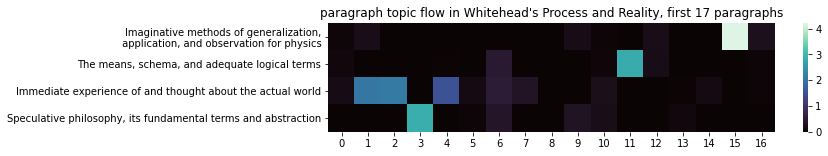

In [66]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [10, 2]
title_ = 'paragraph topic flow in Whitehead\'s Process and Reality, first 17 paragraphs'
g=sns.heatmap(par_topic_stem.T, cmap='mako', yticklabels=topic_labels)

g.set_title(title_)
g.savefig(viz_path + title_ + '.svg')
plt.show()

In [70]:
plot_df = pd.DataFrame(par_topic_stem.T)
#plot_df = par_topic_stem_reordered.iloc[:,(number_of_word_features+1):]
plot_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.053143,0.221613,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.204270,0.042200,0.000000,0.228004,0.002669,0.000000,4.216934,0.266537
1,0.086263,0.000000,0.000000,0.000000,0.02900,0.000000,0.509843,0.000000,0.000000e+00,0.000000,0.074695,2.831844,0.200356,0.000000,0.000000,0.000000,0.036364
2,0.193804,2.044484,2.105091,0.000000,1.52602,0.164103,0.548404,0.369337,0.000000e+00,0.003159,0.248185,0.000000,0.000000,0.018067,0.161952,0.000000,0.047832
3,0.000000,0.000000,0.000000,2.872484,0.00000,0.033148,0.402421,0.000000,2.088818e-53,0.343188,0.216019,0.000000,0.000000,0.087281,0.000000,0.000000,0.000000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.053143,0.221613,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.204270,0.042200,0.000000,0.228004,0.002669,0.000000,4.216934,0.266537
1,0.086263,0.000000,0.000000,0.000000,0.02900,0.000000,0.509843,0.000000,0.000000e+00,0.000000,0.074695,2.831844,0.200356,0.000000,0.000000,0.000000,0.036364
2,0.193804,2.044484,2.105091,0.000000,1.52602,0.164103,0.548404,0.369337,0.000000e+00,0.003159,0.248185,0.000000,0.000000,0.018067,0.161952,0.000000,0.047832
3,0.000000,0.000000,0.000000,2.872484,0.00000,0.033148,0.402421,0.000000,2.088818e-53,0.343188,0.216019,0.000000,0.000000,0.087281,0.000000,0.000000,0.000000


In [71]:
plot_df = plot_df.transpose()

In [72]:
plot_df.columns = topic_labels

In [73]:
plot_df.index.name='paragraph'

In [74]:
plot_df

,"Imaginative methods of generalization,\n application, and observation for physics","The means, schema, and adequate logical terms",Immediate experience of and thought about the actual world,"Speculative philosophy, its fundamental terms and abstraction"
paragraph,,,,
0,0.053143,0.086263,0.193804,0.000000e+00
1,0.221613,0.000000,2.044484,0.000000e+00
2,0.000000,0.000000,2.105091,0.000000e+00
3,0.000000,0.000000,0.000000,2.872484e+00
4,0.000000,0.029000,1.526020,0.000000e+00
5,0.000000,0.000000,0.164103,3.314771e-02
6,0.000000,0.509843,0.548404,4.024213e-01
7,0.000000,0.000000,0.369337,0.000000e+00
8,0.000000,0.000000,0.000000,2.088818e-53


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

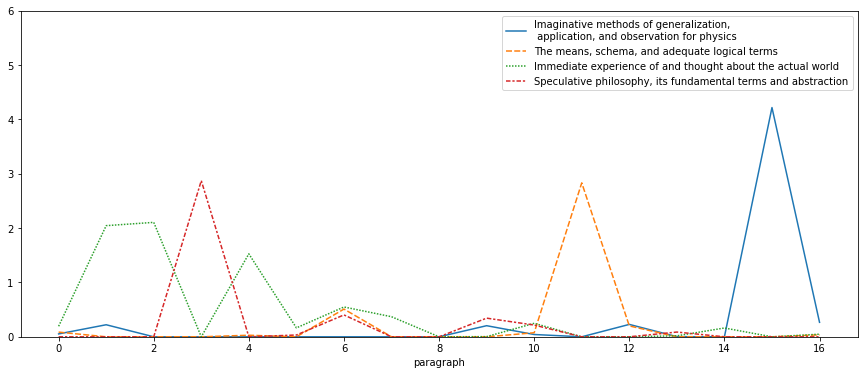

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns
#g = sns.lineplot(par_topic_stem_reordered.iloc[:,(number_of_word_features+1):])
plt.rcParams["figure.figsize"] = [15,6]
g = sns.lineplot(data=plot_df)
g.set(ylim=(0, 6))
g.savefig(viz_path + 'linegraph_of_'+title_ + '.svg')
g.set_title(title_)

plt.show()


In [57]:
(par_topic_stem > .15).astype(int)

array([[0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [262]:
(par_topic_lemma > .2).astype(int)

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

<AxesSubplot:>

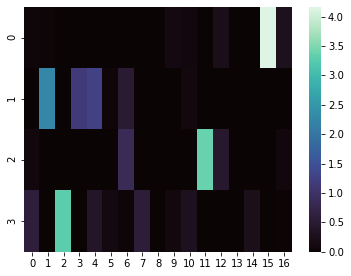

In [263]:
sns.heatmap(par_topic_lemma.T, cmap='mako')

### Choose longer excerpt from Whitehead, the entire first chapter

In [77]:

chapter_2_pos = hume_echu_par_df[hume_echu_par_df['par_text'].str.contains('CHAPTER II')].index[0]-start_maintext_row
chapter_2_pos


98

In [78]:
hume_echu_par_df.iloc[chapter_2_pos:chapter_2_pos+20, :]

,par_text,word_tokenized_par,sb_stemmed_par,lemmatized_par
415,CHAPTER II THE CATEGOREAL SCHEME i,"[CHAPTER, II, THE, CATEGOREAL, SCHEME, i]",chapter ii the categor scheme i,CHAPTER II THE CATEGOREAL SCHEME i
416,SECTION I,"[SECTION, I]",section i,SECTION I
417,[27] This chapter contains an anticipatory sk...,"[[, 27, ], This, chapter, contains, an, antici...",[27] this chapter contain an anticipatori ske...,[27] This chapter contains an anticipatory sk...
418,'Actual entities'- also termed 'actual occasi...,"['Actual, entities'-, also, termed, 'actual, o...",actual entities'- also term actual occasions'...,'Actual entities'- also termed 'actual occasi...
419,In its recurrence to the notion oi a pluralit...,"[In, its, recurrence, to, the, notion, oi, a, ...",in it recurr to the notion oi a plural of act...,In it recurrence to the notion oi a plurality...
420,"1 Cf. my Science and the Modern World, Ch. II...","[1, Cf, ., my, Science, and, the, Modern, Worl...","1 cf. my scienc and the modern world, ch. iii...","1 Cf. my Science and the Modern World, Ch. II..."
421,The Categoreal Scheme 19,"[The, Categoreal, Scheme, 19]",the categor scheme 19,The Categoreal Scheme 19
422,of 'substance' is transformed into that of 'a...,"[of, 'substance, ', is, transformed, into, tha...",of substanc is transform into that of actual ...,of 'substance' is transformed into that of 'a...
423,Each actual entity is analysable in an indefi...,"[Each, actual, entity, is, analysable, in, an,...",each actual entiti is analys in an indefinit ...,Each actual entity is analysable in an indefi...
424,With the purpose of obtaining a one-substance...,"[With, the, purpose, of, obtaining, a, one-sub...",with the purpos of obtain a one-subst cosmolo...,With the purpose of obtaining a one-substance...


In [79]:
start_row = 2
same_end_as_hume = 18
end_of_first_part = chapter_2_pos
end_row = end_of_first_part
section_1_df = pd.DataFrame(hume_echu_par_df.iloc[start_row:end_row+1, :])
section_1_df

,par_text,word_tokenized_par,sb_stemmed_par,lemmatized_par
319,[4] This course of lectures is designed as an...,"[[, 4, ], This, course, of, lectures, is, desi...",[4] this cours of lectur is design as an essa...,[4] This course of lecture is designed a an e...
320,Speculative Philosophy is the endeavour to fr...,"[Speculative, Philosophy, is, the, endeavour, ...",specul philosophi is the endeavour to frame a...,Speculative Philosophy is the endeavour to fr...
321,"[5] 'Coherence,' as here employed, means that...","[[, 5, ], 'Coherence, ,, ', as, here, employed...","[5] coherence, as here employed, mean that th...","[5] 'Coherence,' a here employed, mean that t..."
322,"The term 'logical' has its ordinary meaning, ...","[The, term, 'logical, ', has, its, ordinary, m...","the term logic has it ordinari meaning, inclu...","The term 'logical' ha it ordinary meaning, in..."
323,It will also be noticed that this ideal of sp...,"[It, will, also, be, noticed, that, this, idea...",it will also be notic that this ideal of spec...,It will also be noticed that this ideal of sp...
...,...,...,...,...
411,refuse to abstract from the individual peculi...,"[refuse, to, abstract, from, the, individual, ...",refus to abstract from the individu peculiar ...,refuse to abstract from the individual peculi...
412,Philosophy destroys its usefulness when it in...,"[Philosophy, destroys, its, usefulness, when, ...",philosophi destroy it use when it indulg in b...,Philosophy destroys it usefulness when it ind...
413,"Analogously, we do not trust any recasting of...","[Analogously, ,, we, do, not, trust, any, reca...","analogously, we do not trust ani recast of sc...","Analogously, we do not trust any recasting of..."
414,The useful function of philosophy is to promo...,"[The, useful, function, of, philosophy, is, to...",the use function of philosophi is to promot t...,The useful function of philosophy is to promo...


In [80]:
section_1_df.iloc[15:16, :]

,par_text,word_tokenized_par,sb_stemmed_par,lemmatized_par
334,larger generalities. In natural science this ...,"[larger, generalities, ., In, natural, science...",larger generalities. in natur scienc this rig...,larger generalities. In natural science this ...


In [81]:
section_1_df.iloc[88:89, :]

,par_text,word_tokenized_par,sb_stemmed_par,lemmatized_par
407,[24] This demand for an intellectual justific...,"[[, 24, ], This, demand, for, an, intellectual...",[24] this demand for an intellectu justif of ...,[24] This demand for an intellectual justific...


In [82]:
vectorizer_stem = CountVectorizer(stop_words='english')


In [83]:
par_word_stem = vectorizer_stem.fit_transform(section_1_df['sb_stemmed_par'])
par_word_stem.shape

(97, 1321)

In [84]:
num_topics = 4

In [85]:
nmf_model_stem = NMF(num_topics )
par_topic_stem = nmf_model_stem.fit_transform(par_word_stem)
par_topic_stem.shape

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(97, 4)

In [86]:
topic_word_stem = nmf_model_stem.components_
topic_word_stem.shape

(4, 1321)

In [87]:
words_stem = vectorizer_stem.get_feature_names()
topics_stem = nmf_model_stem.components_.argsort(axis=1)[:, -1:-7:-1]
topic_words_stem = [[words_stem[e] for e in word_list] for word_list in topics_stem]
topic_words_stem

[['imagin', 'method', 'general', 'physics', 'observ', 'success'],
 ['experi', 'scienc', 'religion', 'thought', 'sensit', 'subject'],
 ['fact', 'metaphys', 'express', 'general', 'proposit', 'univers'],
 ['philosophi', 'general', 'particular', 'notion', 'scheme', 'philosoph']]

In [88]:
par_topic_stem[15, :]

array([3.45950343, 0.        , 0.        , 0.        ])

<AxesSubplot:>

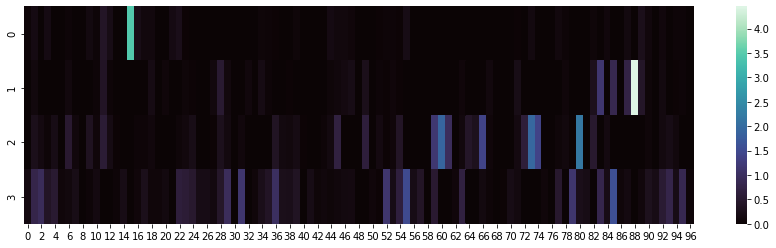

In [89]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [15,4]
sns.heatmap(par_topic_stem.T, cmap='mako')

In [277]:
from scipy import spatial

<AxesSubplot:>

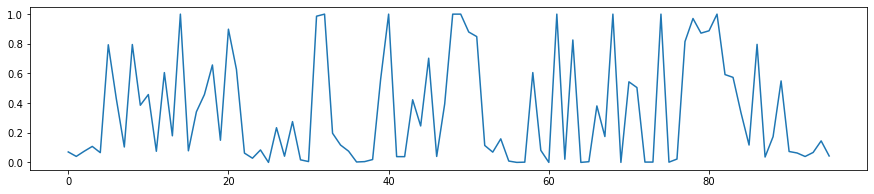

In [278]:
import matplotlib as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,3]
continuity_chronology = [spatial.distance.cosine(par_topic_stem[i,:], par_topic_stem[i+1, :]) for i in range(par_topic_stem.shape[0]-1)]
sns.lineplot(x=range(par_topic_stem.shape[0]-1), y=continuity_chronology)

<AxesSubplot:>

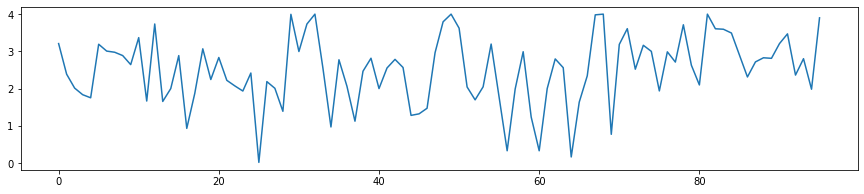

In [74]:

plt.rcParams["figure.figsize"] = [15,3]
continuity_chronology = [spatial.distance.canberra(par_topic_stem[i,:], par_topic_stem[i+1, :]) for i in range(par_topic_stem.shape[0]-1)]
sns.lineplot(x=range(par_topic_stem.shape[0]-1), y=continuity_chronology)

[(0.0, 350.0)]

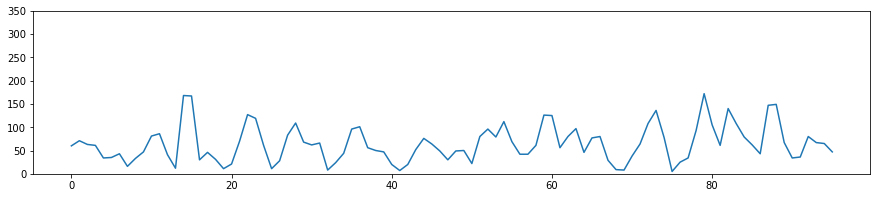

In [80]:

continuity_chronology = [spatial.distance.cityblock(par_word_stem[i,:].todense(), par_word_stem[i+1, :].todense()) for i in range(par_word_stem.shape[0]-1)]
l_plot = sns.lineplot(x=range(par_word_stem.shape[0]-1), y=continuity_chronology)
l_plot.set(ylim=(0, 350))

<AxesSubplot:>

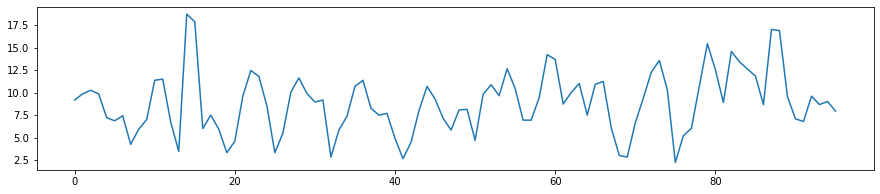

In [82]:
continuity_chronology = [spatial.distance.euclidean(par_word_stem[i,:].todense(), par_word_stem[i+1, :].todense()) for i in range(par_word_stem.shape[0]-1)]
sns.lineplot(x=range(par_word_stem.shape[0]-1), y=continuity_chronology)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:

tfidf.fit(corpus)

In [ ]:
tfidf_matrix = tfidf.transform(corpus)
tfidf.get_feature_names

In [ ]:
oldtext = hume_excerpt
newtext = re.sub(r'(?<!\n)\n(?![\n\t])', ' ', oldtext.replace('\r', ''))
newtext

In [ ]:
text = hume_excerpt
re.sub(r"\n(?=[^\n\t])", " ", text)
text

In [ ]:
s=hume_excerpt
s = ' '.join(s.splitlines())
s

In [ ]:
my_string = hume_excerpt
string = my_string.rstrip('\r\n')
string

In [ ]:
test_str = hume_excerpt
' '.join([line.strip() for line in test_str.strip().splitlines() if line.strip()])

Alternative way of importing the file

In [ ]:
hume_filename = 'Hume_ECHU.txt'
hume_file = open(hume_filename, 'rt')
hume_string2 = hume_file.read()
hume_string[5000:12000]

In [ ]:
len(hume_string2)

In [ ]:
hume_string[:3000]